In [2]:
import pandas as pd
import matplotlib.pyplot as plt

beer_consumption = pd.read_csv("beer_consuption.csv")



In [8]:

estatisticas = beer_consumption.describe()
estatisticas.to_csv("describe.csv")
estatisticas


,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


In [10]:
# Podemos ver que mais da metade dos dias tem zero precipitação
# Vamos separar o dataset e comparar
estatisticas_seca = beer_consumption[beer_consumption["Precipitacao (mm)"] == 0].describe()
estatisticas_seca

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,218.000000,218.000000,218.000000,218.0,218.000000,218.000000
mean,21.258716,17.101376,27.103211,0.0,0.279817,25.929757
std,3.133631,2.933856,4.035652,0.0,0.449942,4.341602
min,14.180000,10.600000,16.100000,0.0,0.000000,14.343000
25%,19.150000,14.900000,24.825000,0.0,0.000000,22.558250
50%,21.190000,17.200000,27.200000,0.0,0.000000,25.470000
75%,23.320000,19.300000,29.575000,0.0,1.000000,29.232750
max,28.860000,24.500000,35.800000,0.0,1.000000,37.937000


In [ ]:
estatisticas_chuva = beer_consumption[beer_consumption["Precipitacao (mm)"] != 0].describe()
estatisticas_chuva

# Claramente o consumo em dias chuvosos é muito semelhante aos dias secos

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,21.178367,17.995238,25.882313,12.903401,0.292517,24.617769
std,3.258008,2.576775,4.622602,16.862008,0.456474,4.381487
min,12.900000,10.900000,14.500000,0.100000,0.000000,14.940000
25%,18.870000,16.100000,22.800000,1.800000,0.000000,21.430000
50%,21.640000,18.600000,26.300000,6.300000,0.000000,24.330000
75%,23.130000,19.700000,29.150000,18.100000,1.000000,28.024000
max,28.220000,23.300000,36.500000,94.800000,1.000000,36.254000


In [22]:
# Renomeamos as colunas para facilitar a codificação
beer_consumption.columns = [
    "date",
    "avgtemp",
    "mintemp",
    "maxtemp",
    "rain",
    "weekend",
    "consumption"
]

beer_consumption

,date,avgtemp,mintemp,maxtemp,rain,weekend,consumption
0,01/01/2015,27.30,23.9,32.5,0.0,0,25.461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28.972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30.814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29.799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28.900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32.307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26.095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22.309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20.467


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


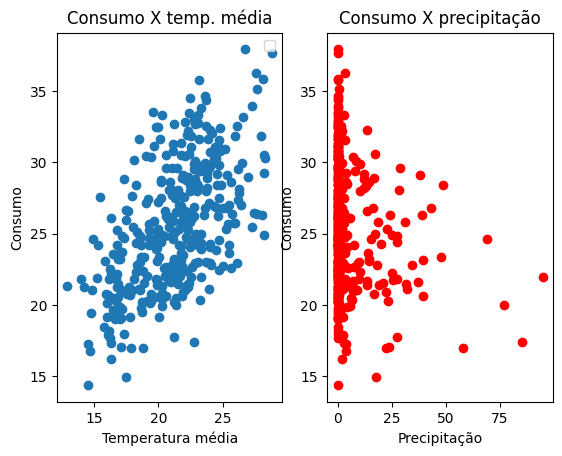

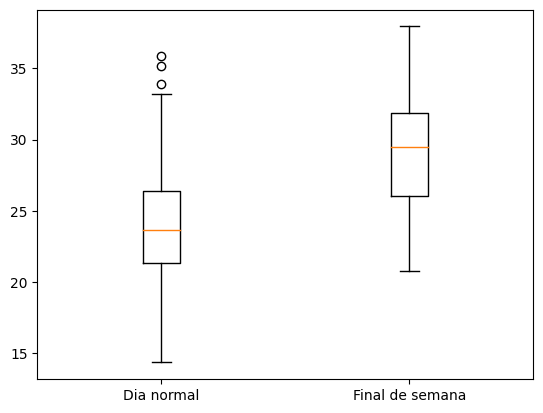

In [27]:
plt.subplot(1, 2, 1)
plt.scatter(beer_consumption.avgtemp, beer_consumption.consumption)
plt.xlabel("Temperatura média")
plt.ylabel("Consumo")
plt.title("Consumo X temp. média")
plt.legend()

plt.subplot(1,2, 2)
plt.scatter(beer_consumption.rain, beer_consumption.consumption, color="#FF0000")
plt.xlabel("Precipitação")
plt.ylabel("Consumo")
plt.title("Consumo X precipitação")
plt.savefig("figures/tempandrainscatter.jpg")
plt.show()

plt.boxplot(
    [
        beer_consumption[beer_consumption.weekend == 0].consumption, 
        beer_consumption[beer_consumption.weekend == 1].consumption
    ],
    labels=["Dia normal", "Final de semana"]
            )
plt.savefig("figures/weekendbp.jpg")
